In [1]:
from run import Runner
from mytorch.utils.goodies import FancyDict
from matplotlib import pyplot as plt
import numpy as np
import torch

args = {'name' : 'testrun',
'dataset' : 'RLF/lf',
'model' : 'compgcn',
'score_func' : 'conve',
'opn' : 'corr',                 
'use_wandb' : False, 
'batch_size' : 128,       
'gamma' : 40.0,			
'gpu' : '-1',			
'max_epochs' : 1,  	
'l2' : 0.0,			
'lr' : 0.001,			
'lbl_smooth' : 0.1,	
'num_workers' : 10,                     
'seed' : 41504,     	
'restore' : False,            
'bias' : False   ,         
'num_bases' : -1, 	
'init_dim' : 100,	
'gcn_dim' : 200 ,	
'embed_dim' : None, 	
'gcn_layer' : 1 	,
'dropout' : 0.1	,
'hid_drop' : 0.3	,
'hid_drop2' : 0.3	,
'feat_drop' : 0.3	,
'k_w' : 10 	,
'k_h' : 20 	,
'num_filt' : 200, 	
'ker_sz' : 7 	,
'log_dir' : './log/',               
'config_dir' : './config/',
'trim': False,
'trim_ratio': 0.005,
'use_fasttext': False
}

args = FancyDict(args)


# # Temp; to test
# args.trim = True

model = Runner(args)

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.1) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


2023-07-21 09:37:37,837 - [INFO] - {}
{}


In [2]:
# # Now load the saved model
model.load_model('./checkpoints/compgcn-conve-rlffam')

In [3]:
# Do the predictions
left_pred, left_ranks = model.predict('valid', mode='tail_batch', report_all=True)
right_pred, right_ranks = model.predict('valid', mode='head_batch', report_all=True)

all_ranks = torch.cat([left_ranks, right_ranks], dim=0)

2023-07-21 09:37:43,051 - [INFO] - [Valid, Tail_Batch Step 0]	testrun


/home/hchoi/Nextcloud/gnn-jdmrlf/CompGCN-jdm/run.py:450: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at ../aten/src/ATen/native/TensorCompare.cpp:413.)
  pred            = torch.where(label.byte(), -torch.ones_like(pred) * 10000000, pred)


2023-07-21 09:37:52,076 - [INFO] - [Valid, Head_Batch Step 0]	testrun


In [4]:
all_ranks.shape

torch.Size([11628])

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('darkgrid')


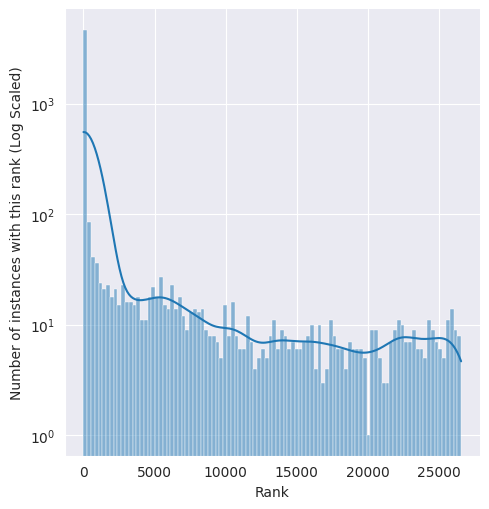

In [7]:
g = sns.displot(left_ranks.numpy(), kde=True, bins=100, log_scale=(False, True))
g.set_axis_labels("Rank","Number of instances with this rank (Log Scaled)")
g.set_titles("Log Scaled Histogram of Ranks corresponding to every instance in valid set.")

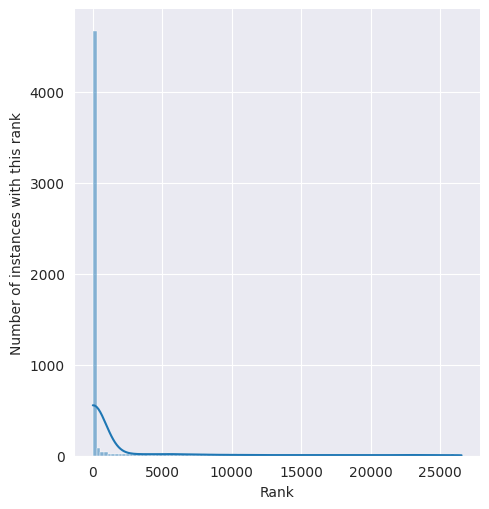

In [8]:
g = sns.displot(left_ranks.numpy(), kde=True, bins=100, log_scale=(False, False))
g.set_axis_labels("Rank","Number of instances with this rank")
g.set_titles("Log Scaled Histogram of Ranks corresponding to every instance in valid set.")

In [9]:
torch.mean(left_ranks)

tensor(1890.2015)